In [1]:
import scanpy as sc
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Import Data
adataA = sc.read_visium("/QRISdata/Q1851/Claire/VLP99_A/")
adataB = sc.read_visium("/QRISdata/Q1851/Claire/VLP99_B/")

adataA.obsm['spatial'] = adataA.obsm['spatial'].astype(int)
adataB.obsm['spatial'] = adataB.obsm['spatial'].astype(int)

data ={"A":adataA, "B":adataB}

/home/uqacause/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
def filter_and_cluster(data):
    sc.pp.filter_cells(adata, min_counts=10)
    sc.pp.filter_genes(adata, min_cells=3)
    sc.pp.calculate_qc_metrics(adata)
    #print("normalize total")
    sc.pp.normalize_total(adata)
    #print("log transform")
    sc.pp.log1p(adata)
    sc.tl.pca(adata, svd_solver="arpack")
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
    sc.tl.umap(adata)
    sc.tl.leiden(adata, resolution=0.5)
    adata.var_names_make_unique()
    return(adata)

In [4]:
for sample, adata in data.items():
    data[sample] = filter_and_cluster(adata)

/home/uqacause/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/sw/auto/rocky8c/epyc3/software/Miniconda3/4.12.0/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/uqacause/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:

In [7]:
# Add Annotation Data

In [5]:
dfA = pd.read_csv("/home/uqacause/Other_Projects/Pete_Cancer_Project_Claire/VLP99_A_Annotation.csv")
dfA.set_index("Barcode", inplace=True)


dfB = pd.read_csv("/QRISdata/Q1851/Claire/VLP99_B_Cases.csv")
dfB.set_index("Barcode", inplace=True)

In [6]:
#set(df['Cases'].tolist())
samples = ['GM16 - Right ovary met', 'GM16 - Left tube met', 'GM74 - Left ovary met', 'GM59 - Pleural met',
           'GM16 - Lymph node met', 'GM16 - Right tube met', 'GM74 - Primary', 'GM59 - Right ovary met2',
           'GM16 - Primary B', 'GM16 - Omental met', 'GM1 - Primary', 'GM59 - Right ovary met',
           'GM16 - Primary A', 'GM16 - Left ovary met', 'GM16 - Appendix met', 'GM59 - Primary']

In [7]:
data["A"].obs["sample"] = dfA['Cases'].astype(str)
data["B"].obs["sample"] = dfB['Cases'].astype(str)

data["B"]

AnnData object with n_obs × n_vars = 5152 × 17967
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'leiden', 'sample'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

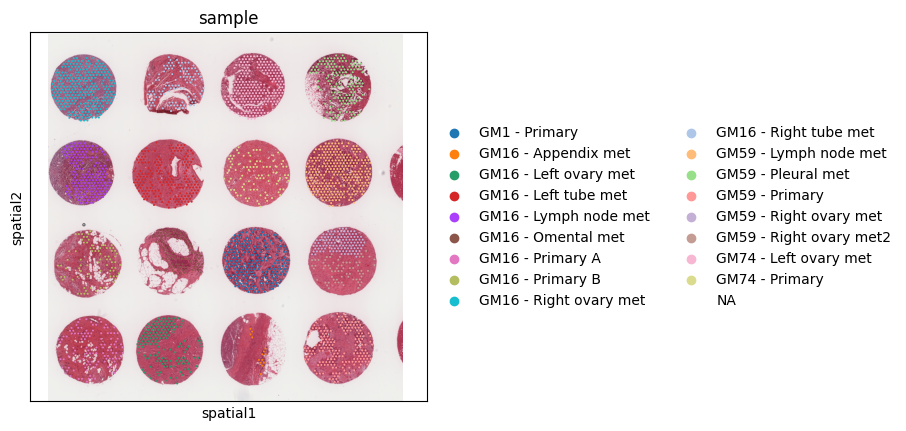

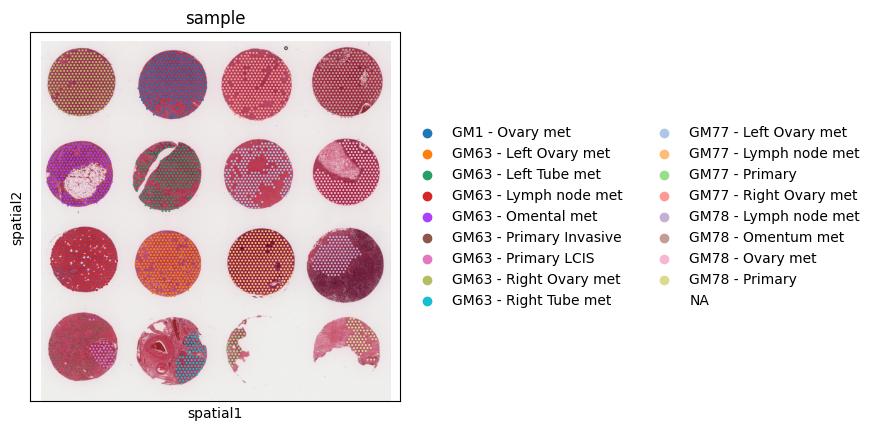

In [8]:
for sample, adata in data.items():
    sc.pl.spatial(adata, color="sample")

# QC Plots

# Graph

In [9]:
gene_list = ["ESR1", "PGR","MKI67","AR","GATA3","FOXA1","CDH1"]
marker_expA = pd.DataFrame(index = gene_list,columns=data['A'].obs['sample'].unique())

#z_scores = sc.pp.scale(adata, copy=True)
for sample in marker_expA.columns:
    subset = data['A'][data['A'].obs["sample"] == sample]
    for gene in gene_list:
        gene_idx = list(subset.var_names == gene).index(True)
        gene_exp = subset.X[:,gene_idx].mean()
        marker_expA[sample][gene] = gene_exp
        

marker_expB = pd.DataFrame(index = gene_list,columns=data['B'].obs['sample'].unique())

#z_scores = sc.pp.scale(adata, copy=True)
for sample in marker_expB.columns:
    subset = data['B'][data['B'].obs["sample"] == sample]
    for gene in gene_list:
        gene_idx = list(subset.var_names == gene).index(True)
        gene_exp = subset.X[:,gene_idx].mean()
        marker_expB[sample][gene] = gene_exp



/home/uqacause/.local/lib/python3.8/site-packages/scipy/sparse/_base.py:651: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)
/home/uqacause/.local/lib/python3.8/site-packages/scipy/sparse/_base.py:651: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)


In [11]:
marker_expA

,GM16 - Primary B,GM1 - Primary,NaN,GM16 - Left tube met,GM16 - Right ovary met,GM16 - Lymph node met,GM74 - Left ovary met,GM59 - Right ovary met,GM74 - Primary,GM16 - Primary A,GM59 - Pleural met,GM59 - Lymph node met,GM59 - Right ovary met2,GM16 - Omental met,GM16 - Left ovary met,GM59 - Primary,GM16 - Right tube met,GM16 - Appendix met
ESR1,0.50687,0.521306,0.0,1.923921,1.278327,1.659416,0.177961,0.161155,0.07487,0.108262,0.445938,0.48847,0.218759,2.2162,1.481334,0.384546,1.941309,1.799161
PGR,0.245809,0.490362,0.0,0.608246,0.436862,0.999645,0.031331,0.006694,0.0,0.030355,0.09714,0.849098,0.042688,0.027562,0.749186,0.587968,0.383201,0.053707
MKI67,0.016788,0.177041,0.0,0.100951,0.055914,0.10749,0.30127,0.154856,0.050983,0.01723,0.10115,0.30932,0.078632,0.061327,0.080882,0.257084,0.066608,0.128729
AR,0.081976,0.327872,0.0,0.21319,0.120453,0.144165,0.019138,0.16059,0.104146,0.051435,0.152902,0.242944,0.120139,0.318467,0.102947,0.13124,0.147201,0.12539
GATA3,1.015643,1.284792,0.0,1.885852,2.282676,2.459148,0.317959,1.715934,0.138154,0.074863,2.344511,2.143662,1.378569,2.48764,1.66754,1.944175,1.805369,2.098028
FOXA1,0.079141,1.161408,0.0,1.073746,1.157315,0.703549,0.542965,1.105894,0.318504,0.054425,1.401191,1.035779,0.916399,1.320214,0.958182,0.994451,1.01035,0.909926
CDH1,0.033551,0.311881,0.0,0.130452,0.194591,0.071777,0.042543,0.355112,0.0,0.0,0.247403,0.348557,0.212313,0.219107,0.187196,0.201565,0.162793,0.109265


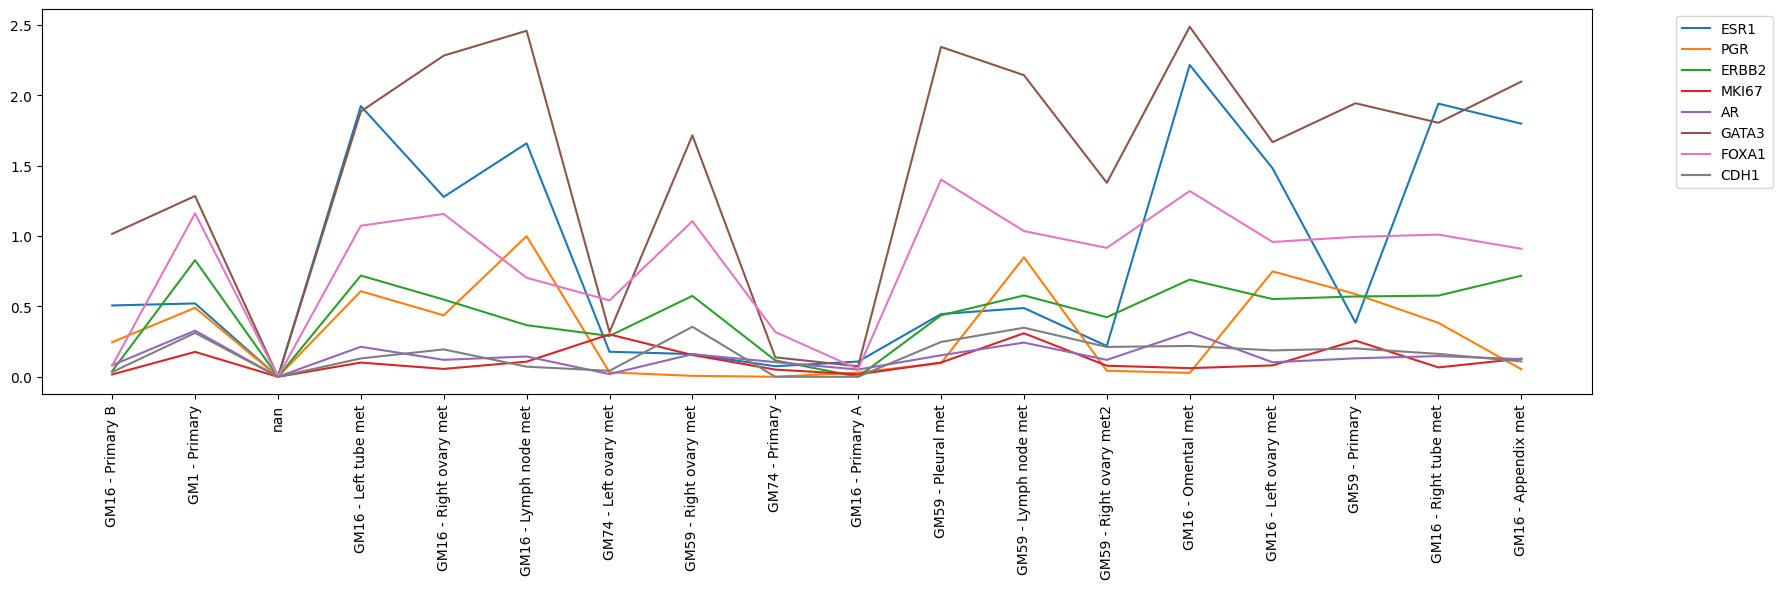

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
marker_expA.transpose().plot(ax = ax)
ax.set_xticks(np.arange(len(marker_expA.columns)))
ax.set_xticklabels(marker_expA.columns,rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [12]:
GM_63 = []
GM78 = []
for sample in marker_expB.columns:
    sample = str(sample)
    if sample.split(" ")[0] == "GM63":
        GM_63.append(sample)
    elif sample.split(" ")[0] == "GM78":
        GM78.append(sample)



In [ ]:
plots = [['GM63 - Primary LCIS','GM63 - Primary Invasive'],
         ['GM63 - Primary LCIS','GM63 - Primary Invasive','GM63 - Lymph node met'],
         ['GM63 - Primary Invasive','GM63 - Lymph node met', 'GM63 - Left Tube met','GM63 - Right Tube met', #'GM63 - Left Ovary met',
          'GM63 - Right Ovary met','GM63 - Omental met'],
         ['GM63 - Primary LCIS','GM63 - Lymph node met', 'GM63 - Left Tube met','GM63 - Right Tube met', #'GM63 - Left Ovary met', 
          'GM63 - Right Ovary met','GM63 - Omental met'],
         ['GM63 - Primary LCIS','GM63 - Primary Invasive','GM63 - Lymph node met', 'GM63 - Left Tube met','GM63 - Right Tube met', #'GM63 - Left Ovary met',
          'GM63 - Right Ovary met','GM63 - Omental met']]


for idx,set in enumerate(plots):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df = marker_expB[GM_63][set]
    df.transpose().plot(ax = ax, marker= "o")
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns,rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig("/QRISdata/Q1851/Andrew_C/Pete_Cancer_Project_Claire/set_"+str(idx)+".JPEG")

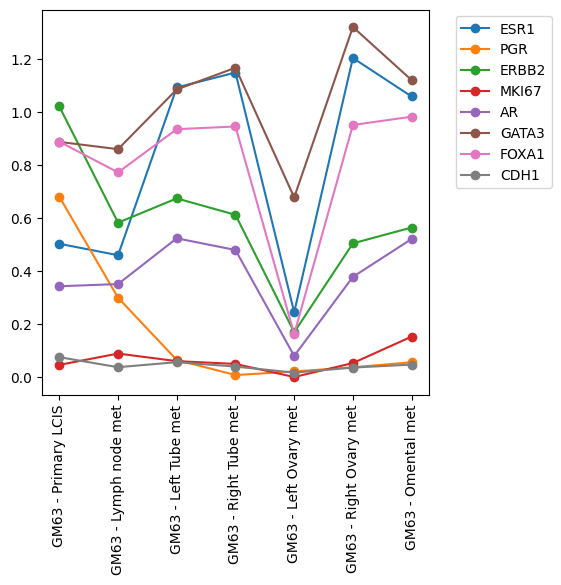

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df = marker_expB[GM_63][plots[3]]
df.transpose().plot(ax = ax, marker= "o")
ax.set_xticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns,rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

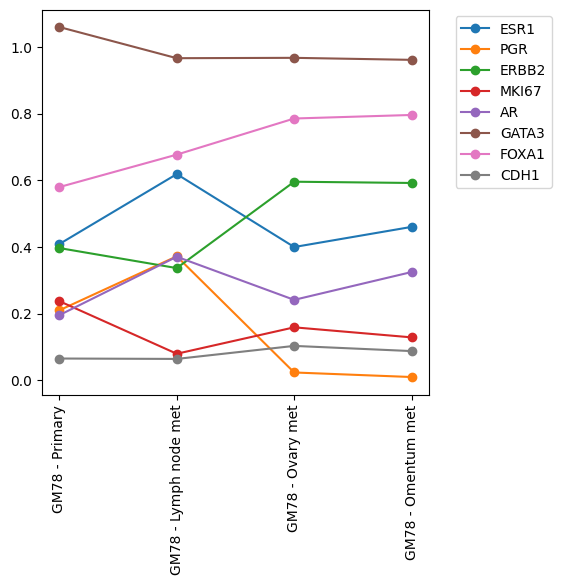

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df = marker_expB[GM78][['GM78 - Primary','GM78 - Lymph node met','GM78 - Ovary met', 'GM78 - Omentum met']]
df.transpose().plot(ax = ax, marker= "o")
ax.set_xticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns,rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("/QRISdata/Q1851/Andrew_C/Pete_Cancer_Project_Claire/set_78.JPEG", pad_inches=10)

# DEG analysis 